# 1. load the data

In [67]:
import pandas as pd


def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, 2:]
    y = data.iloc[:, 1]
    return X, y


X, y = load_data('../output.csv')
# load_data('../Feature Selection/output_after_feature_selection.csv')

In [68]:
X

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1,0,0,3,3,1,1,2,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0,0,1,2,1,1,0,2,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0,0,1,3,3,1,1,3,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0,0,0,2,1,1,0,2,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,58.5,1,0,1,0,3,2,1,1,4,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,34.3,0,0,0,1,3,3,1,0,2,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,53.3,0,0,0,1,2,1,1,0,2,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,68.8,1,0,0,0,3,3,1,1,3,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


In [69]:
y

0      144.000000
1      142.000000
2      135.000000
3       12.000000
4      109.000000
          ...    
395     54.500000
396     49.250000
397     48.500000
398     47.500000
399     46.916667
Name: RelapseFreeSurvival (outcome), Length: 400, dtype: float64

In [70]:
# test feature selection
from sklearn.ensemble import RandomForestRegressor


def feature_selection(X, y, count):
    # Train a Random Forest model
    model = RandomForestRegressor()
    model.fit(X, y)

    # Get feature importance
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print(feature_importance)

    # Select features with importance above a threshold
    selected_features = feature_importance[:count]["Feature"]
    print("Selected Features:", selected_features)
    X = X[selected_features]
    return X


X = feature_selection(X, y, 30)

                              Feature  Importance
36          original_firstorder_Range    0.043710
30       original_firstorder_Kurtosis    0.043425
110        original_glszm_ZoneEntropy    0.032115
0                                 Age    0.027575
26   original_firstorder_90Percentile    0.026677
..                                ...         ...
47             original_glcm_Contrast    0.000853
28        original_firstorder_Entropy    0.000847
53                  original_glcm_Idm    0.000843
58      original_glcm_InverseVariance    0.000789
43      original_glcm_Autocorrelation    0.000642

[118 rows x 2 columns]
Selected Features: 36                             original_firstorder_Range
30                          original_firstorder_Kurtosis
110                           original_glszm_ZoneEntropy
0                                                    Age
26                      original_firstorder_90Percentile
105                 original_glszm_SizeZoneNonUniformity
39             

In [58]:
X

,original_firstorder_Kurtosis,original_firstorder_Range,original_glszm_SizeZoneNonUniformity,original_firstorder_90Percentile,Age,original_glszm_ZoneEntropy,original_shape_Elongation,original_firstorder_Maximum,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_ZonePercentage,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_shape_LeastAxisLength,original_shape_Sphericity,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_gldm_DependenceVariance,original_firstorder_10Percentile,original_gldm_DependenceEntropy,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_shape_MajorAxisLength,original_glrlm_RunEntropy
0,4.594629,3.366632,5.969697,0.708860,41.0,3.325332,0.813912,2.114799,0.517172,0.002314,...,142.526414,23.781937,0.771675,0.004033,38.233794,-0.163500,4.529461,0.011679,32.844370,3.865811
1,3.884960,4.964442,15.850000,2.322627,39.0,3.032144,0.666118,3.857952,0.444391,0.005612,...,146.811544,20.715461,0.603481,0.005064,29.160771,0.665558,2.799725,0.012337,43.504095,4.255471
2,4.760064,4.867321,20.405405,1.961740,31.0,2.485848,0.645083,3.841710,0.534549,0.006752,...,146.244229,21.659822,0.608183,0.005672,27.615779,0.638035,2.863091,0.013216,36.435505,4.232295
3,3.421056,3.881506,25.554455,2.164869,35.0,2.606255,0.770842,3.030400,0.506185,0.003755,...,148.710826,26.590504,0.474509,0.003424,22.976388,0.759496,2.756432,0.010811,53.050724,4.412648
4,3.107181,3.181566,12.551724,1.832410,61.0,2.809279,0.861035,2.315364,0.462282,0.006521,...,148.855127,20.456571,0.756228,0.005788,29.518487,0.434385,2.676170,0.012956,27.265716,4.140589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3.692904,3.930941,6.384615,2.115318,58.5,2.453583,0.389439,3.159904,0.476493,0.003229,...,141.040885,13.993705,0.574024,0.003027,26.705726,0.699630,3.122286,0.011136,51.658584,4.041730
396,2.450481,5.459491,5.357143,2.442335,34.3,2.995603,0.915643,3.522101,0.418382,0.004243,...,150.560123,18.563747,0.601545,0.005833,43.358190,-0.420864,4.465566,0.013711,25.548740,3.873227
397,2.056989,3.990703,1.500000,2.978465,53.3,1.500000,0.657236,3.625107,0.527779,0.003728,...,117.790774,8.413409,0.670158,0.002918,30.473352,0.576653,3.917147,0.014066,18.813092,3.175681
398,3.778624,4.884933,3.533333,1.982108,68.8,3.573557,0.890276,3.157803,0.313693,0.001112,...,166.081625,31.501627,0.758747,0.001355,20.603965,0.235123,3.230629,0.007976,37.616059,4.786990


In [71]:
def split_data_into_test_and_train(X, y):
    np.random.seed(42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_data_into_test_and_train(X, y)

# 2. Linear Reg

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def linear_reg(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)

    print("Model Coefficients:", model.coef_)
    print("Model Intercept:", model.intercept_)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error (MAE):", mae)
    return model


model = linear_reg(X_train, X_test, y_train, y_test)

Mean Squared Error (MSE): 761.7913191276381
R-squared (R2): 0.045443232366001896
Model Coefficients: [ 2.58104776e+00  1.19500484e+09  1.25781820e+00  2.18289696e+01
 -1.12796920e-01 -4.17972964e+00 -8.86766374e+01 -1.19500484e+09
 -5.55097262e+00  8.61853150e+01  1.54074139e+02  3.49452695e+00
  4.87326697e+01 -2.14198163e-01  2.75895206e+01  9.46381315e+01
  1.44457449e+00 -4.28206447e+01 -7.51283296e+01 -4.58318634e+02
  1.72315899e-03  1.19500484e+09  7.09750079e-03 -2.55016954e+01
  8.56864641e-02 -2.14397100e+00 -2.55168665e+00  6.54192169e+02
  3.03645530e-01 -1.91257300e+01 -2.46628745e+01  6.40399225e+02
 -2.28103316e-01 -6.10687649e+00]
Model Intercept: 171.78822537114814
Mean Absolute Error (MAE): 21.046164248055696


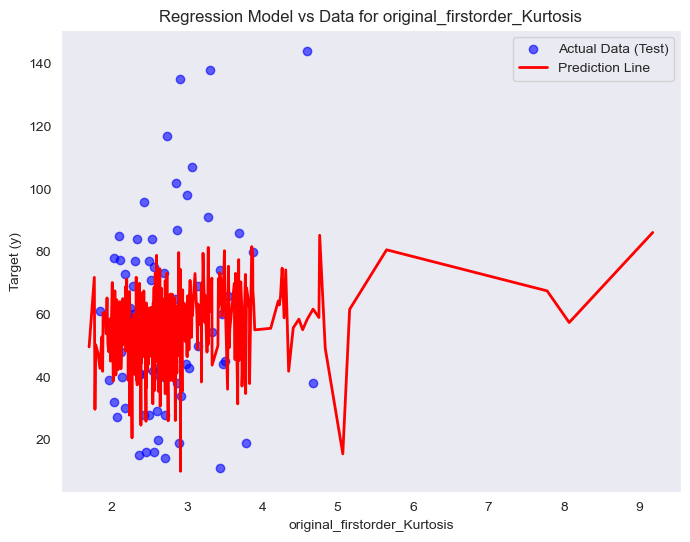

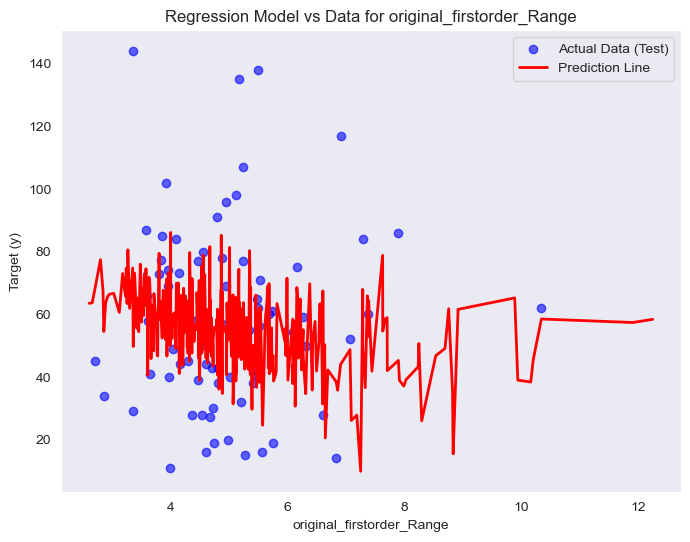

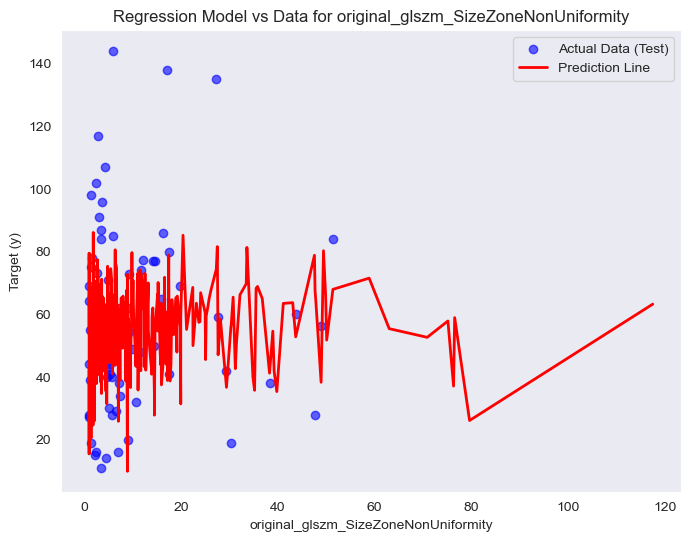

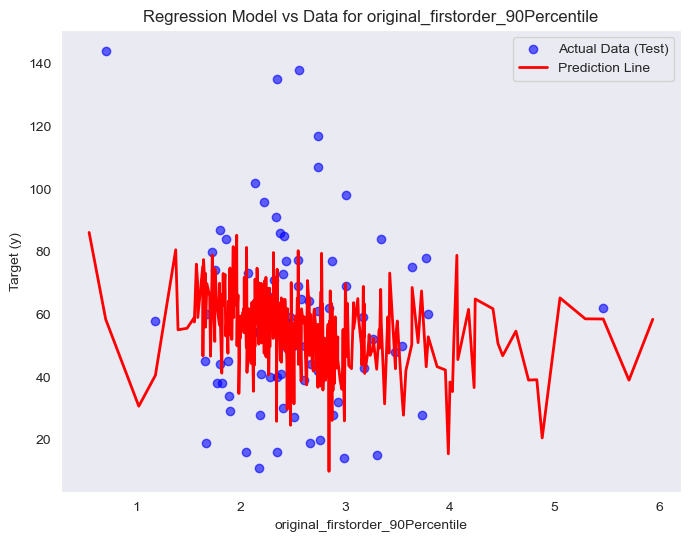

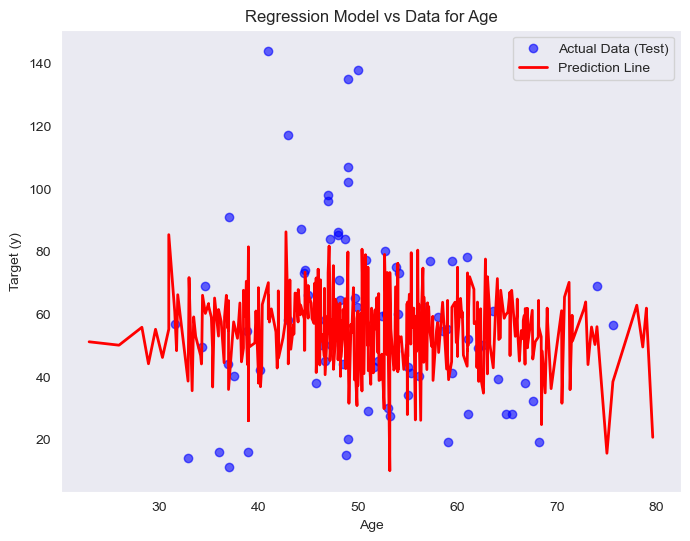

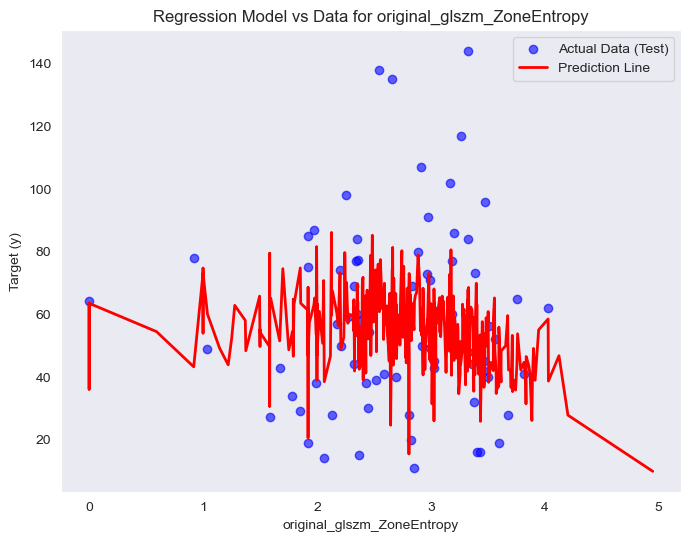

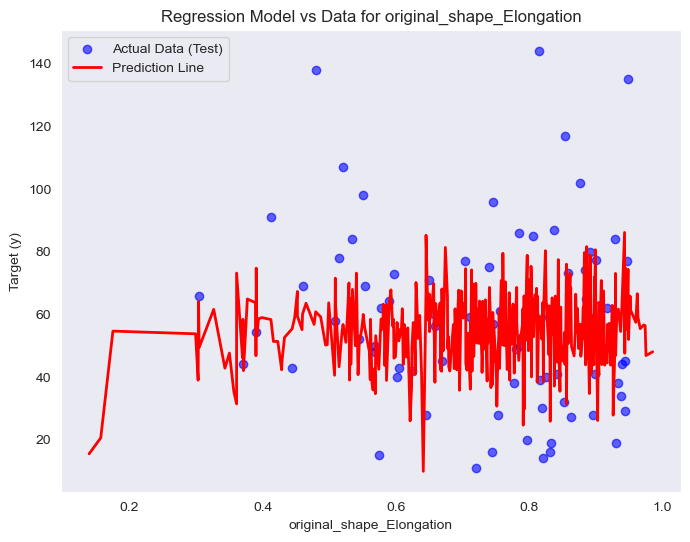

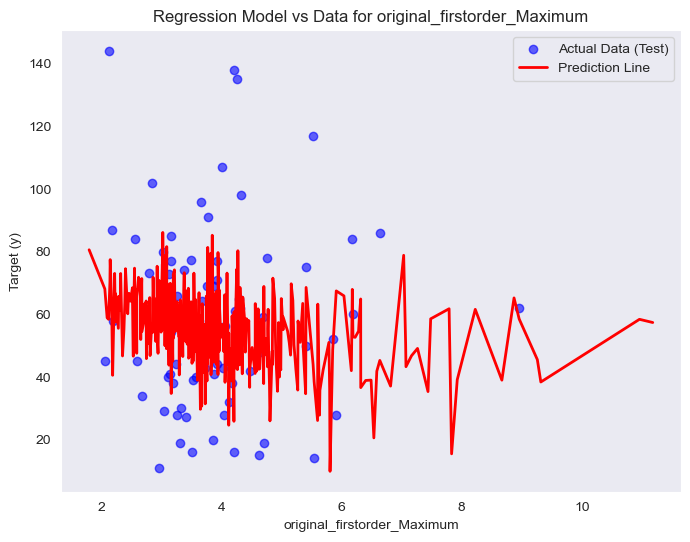

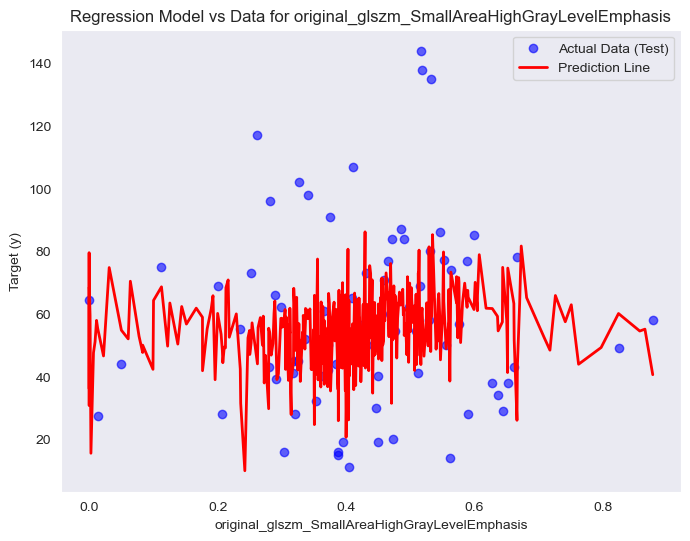

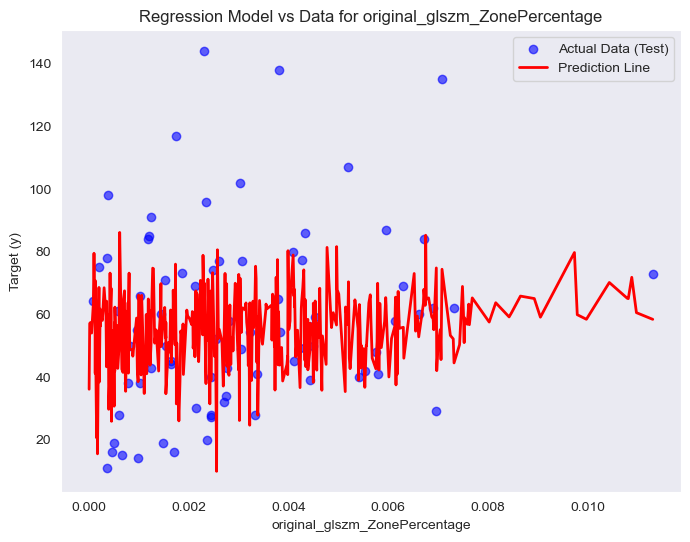

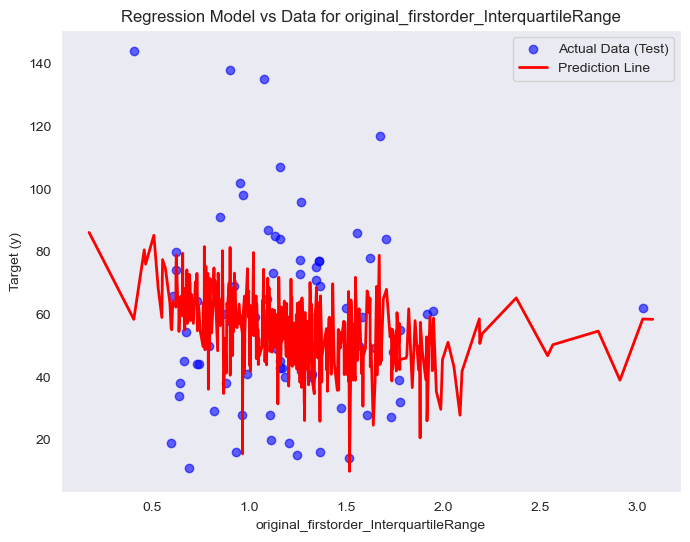

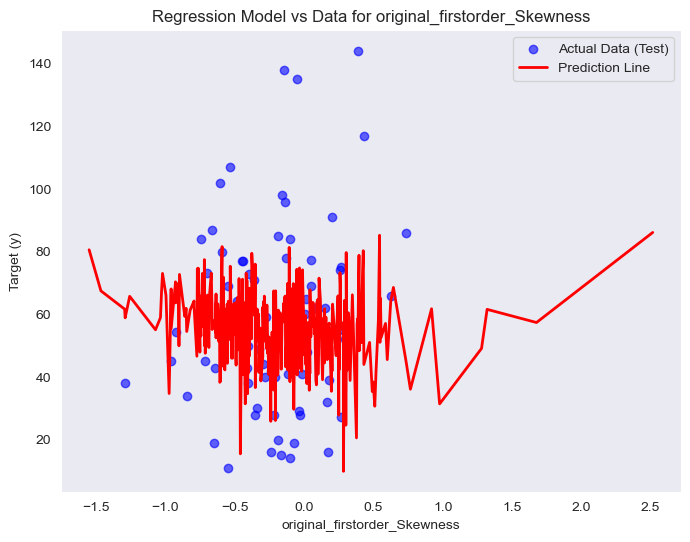

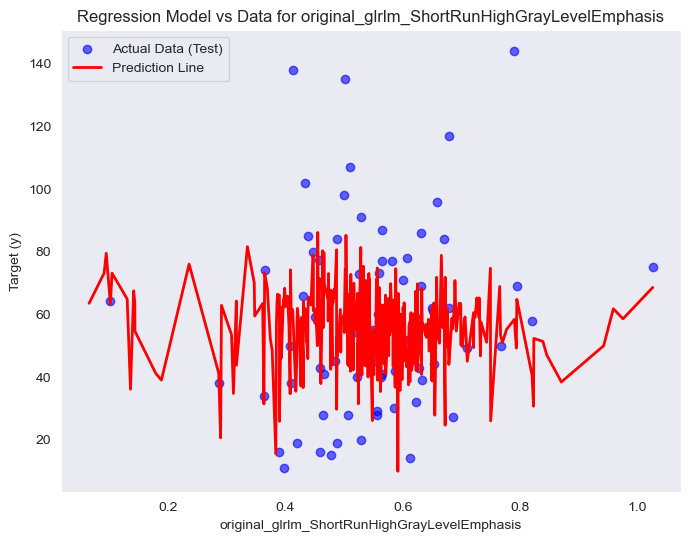

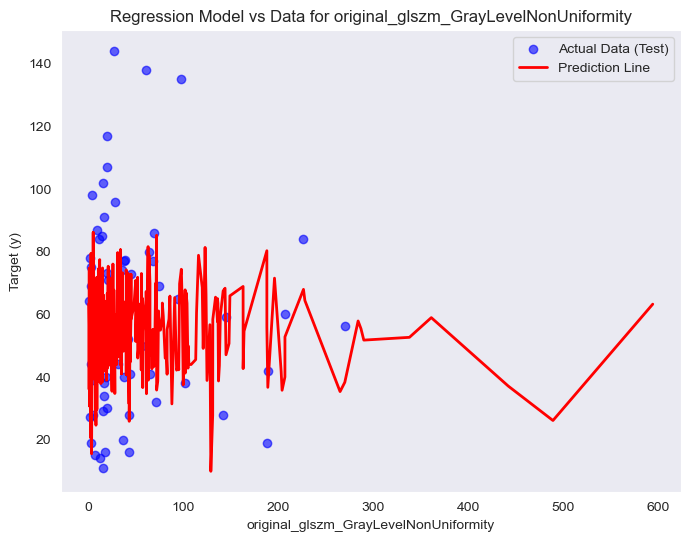

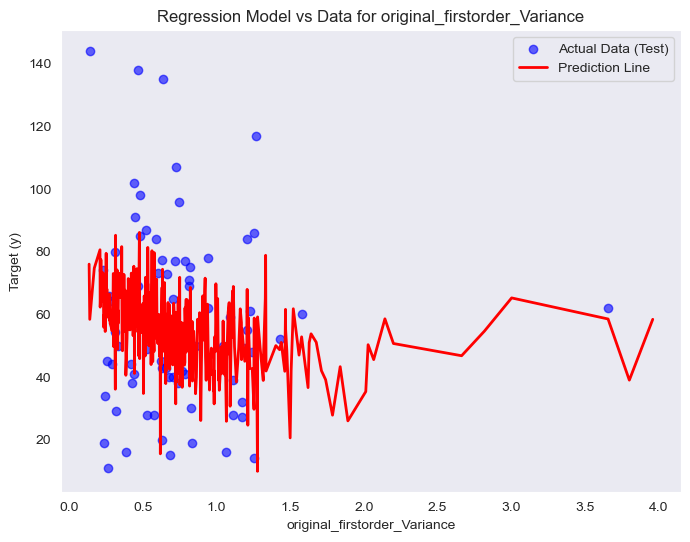

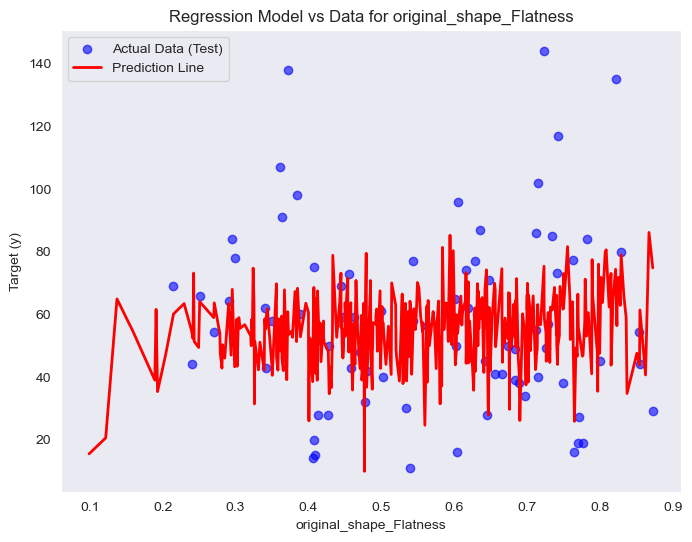

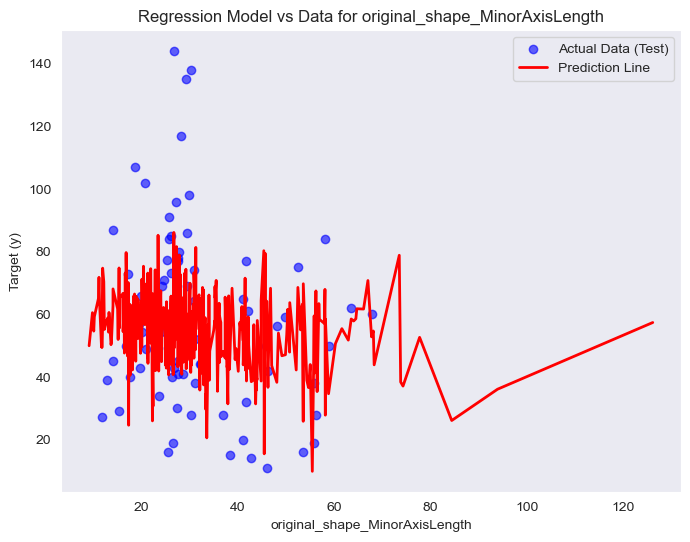

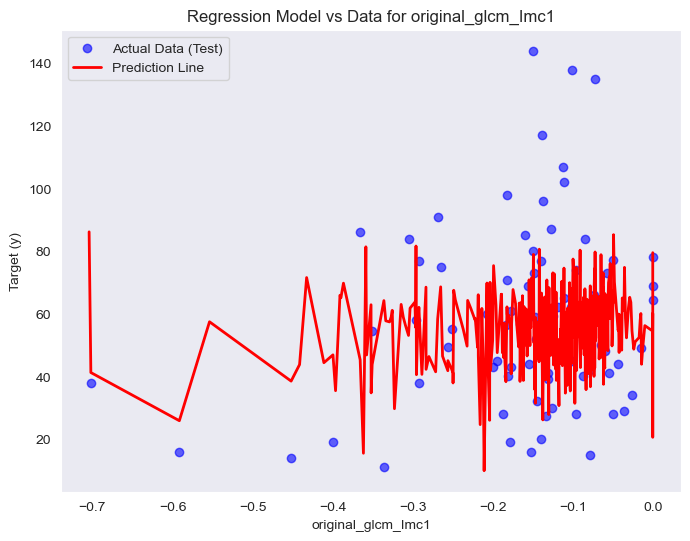

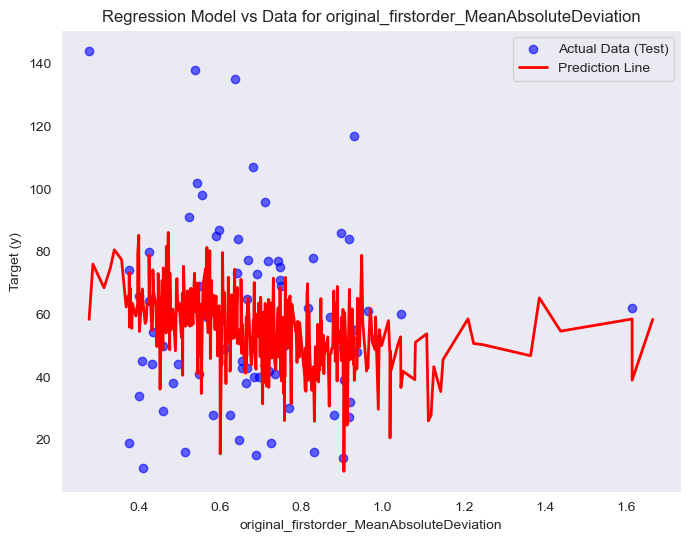

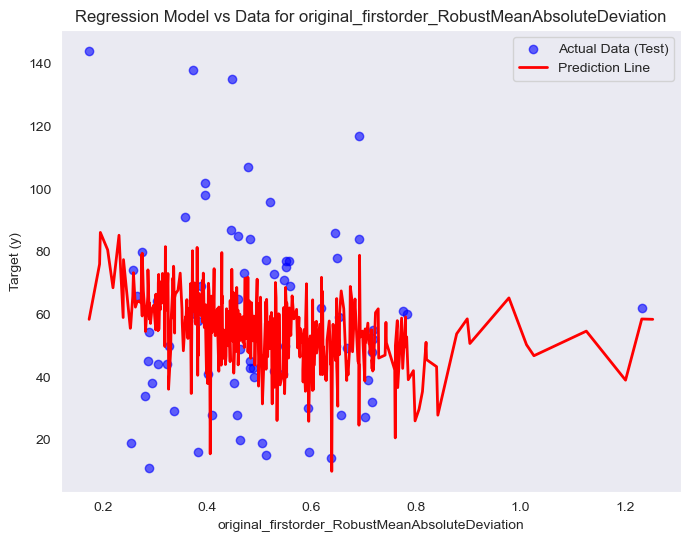

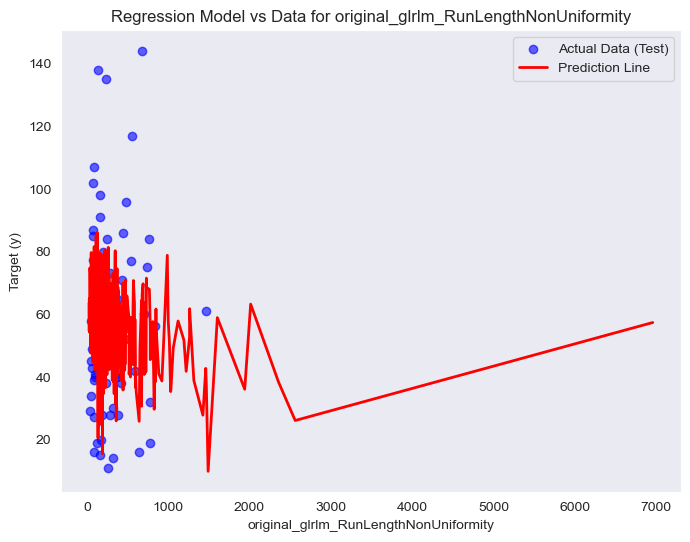

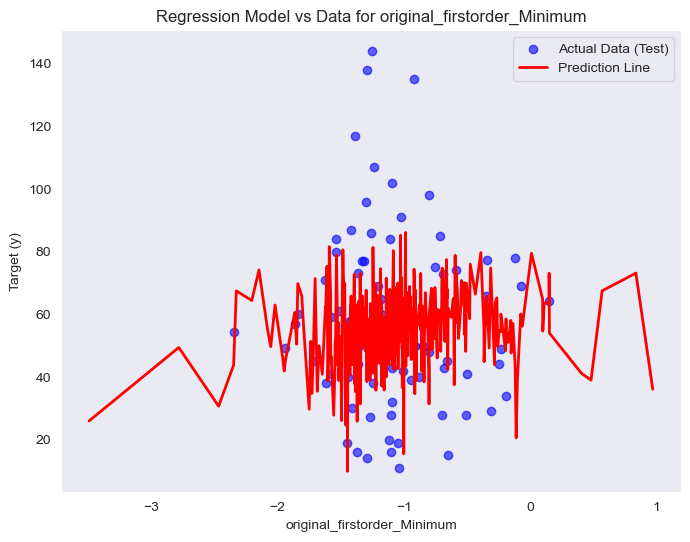

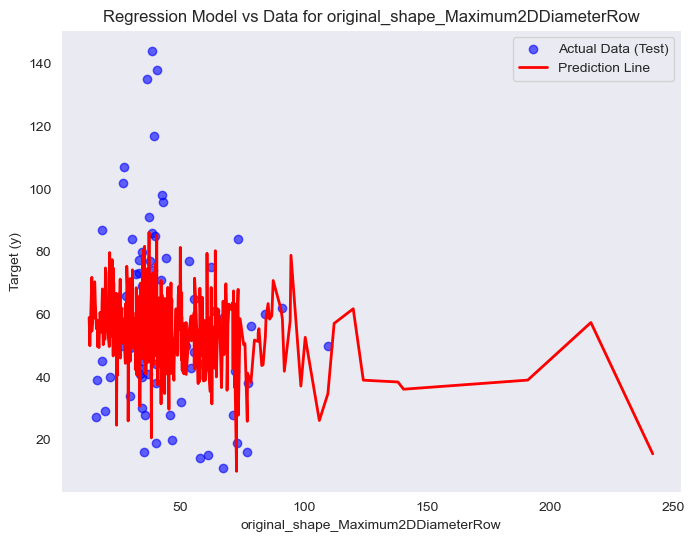

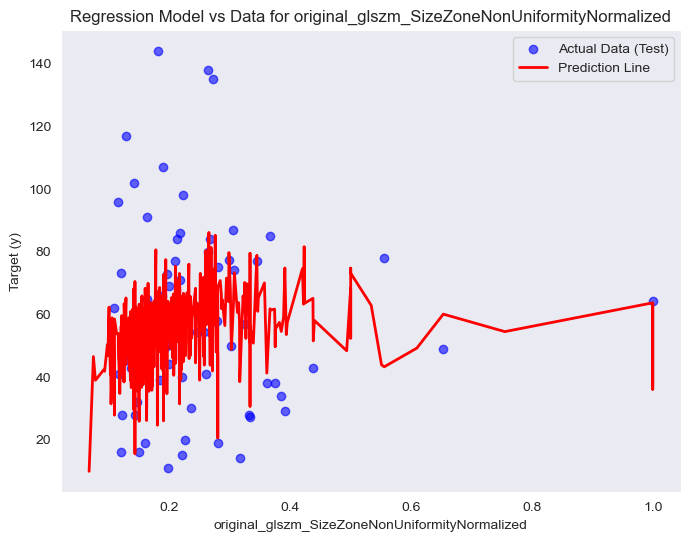

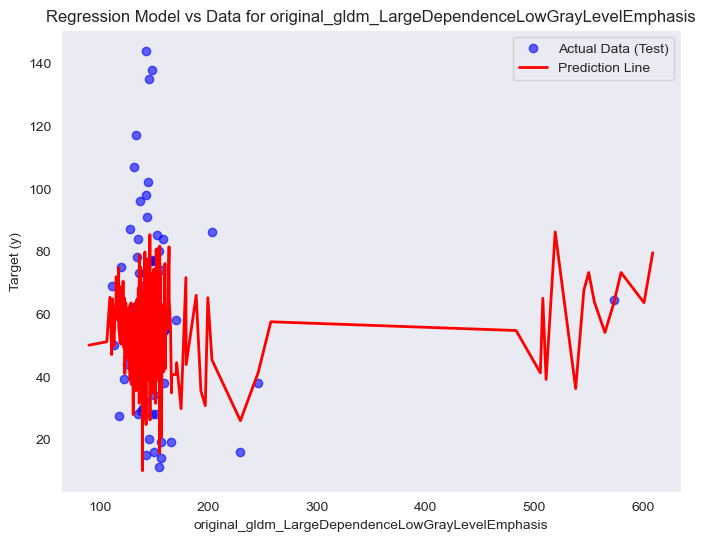

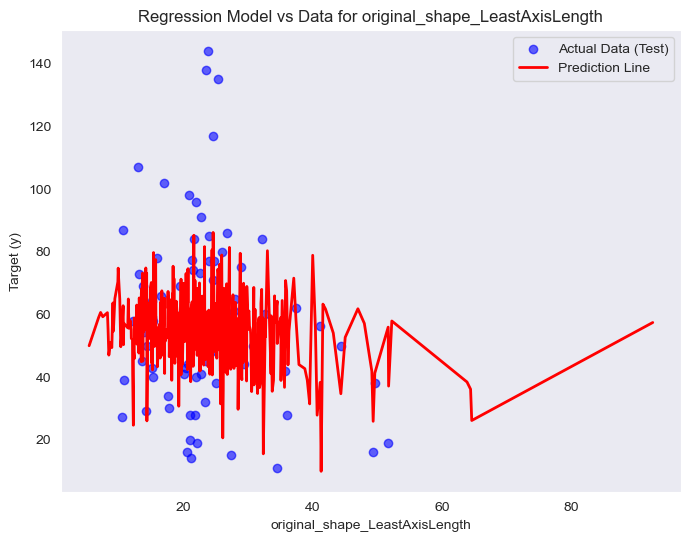

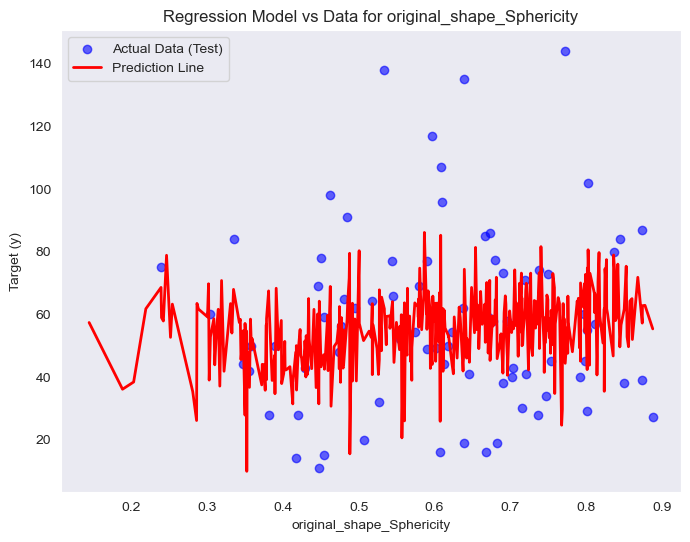

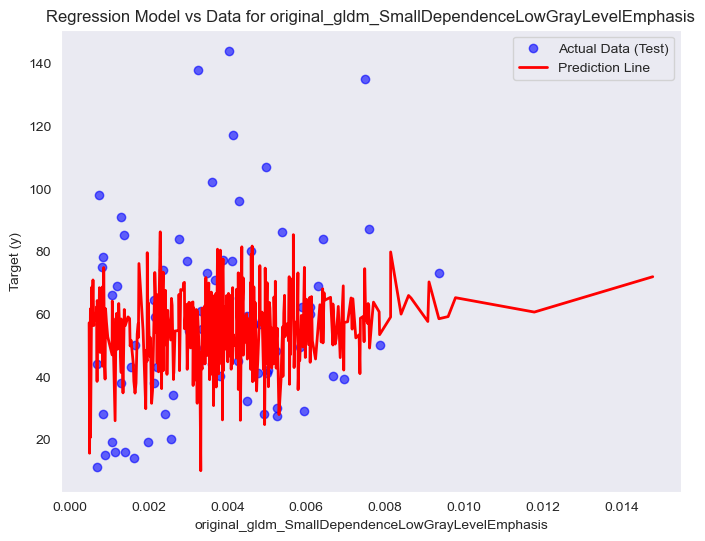

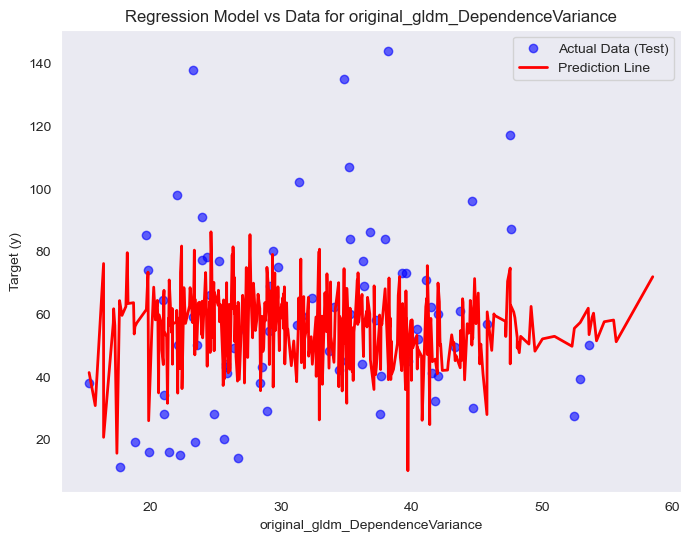

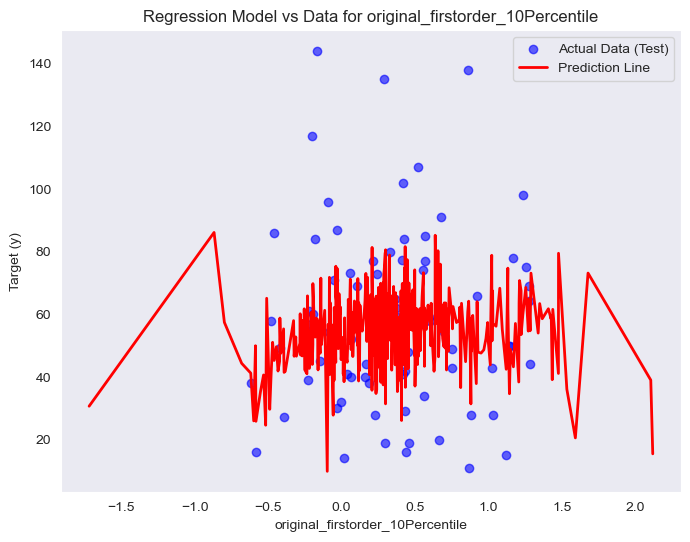

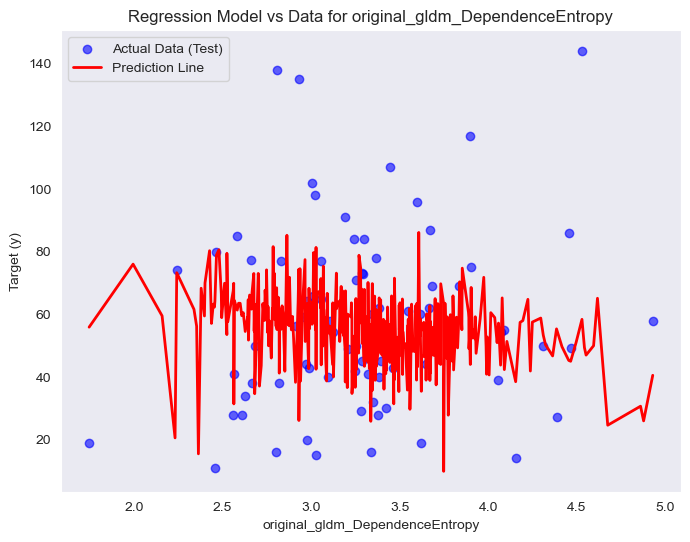

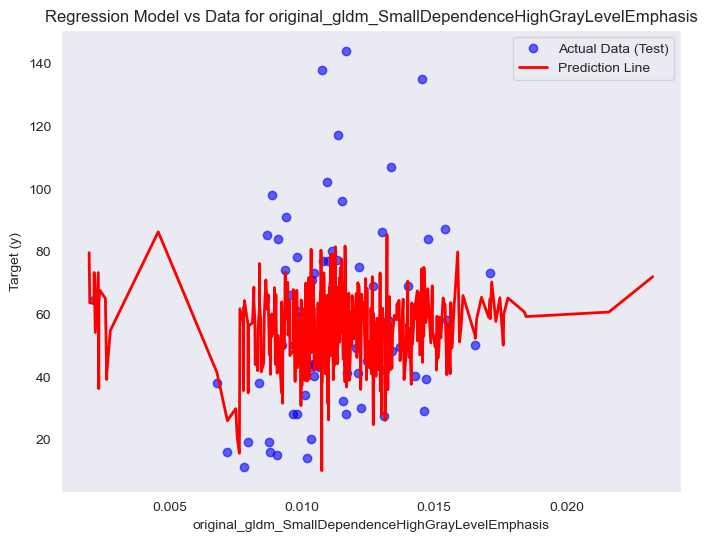

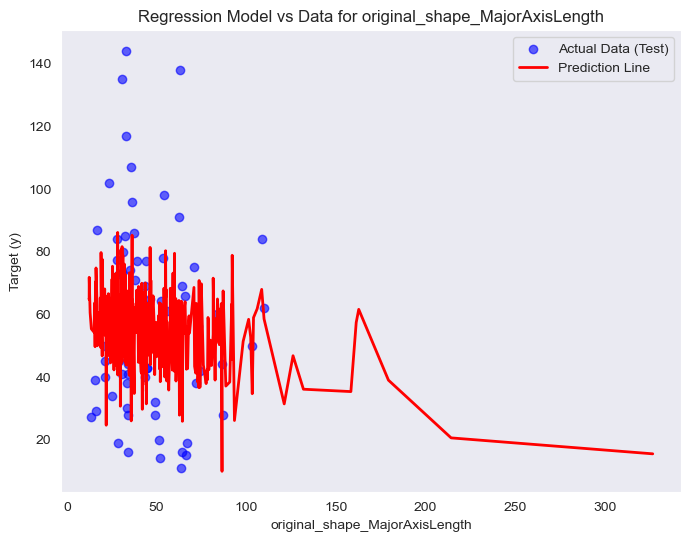

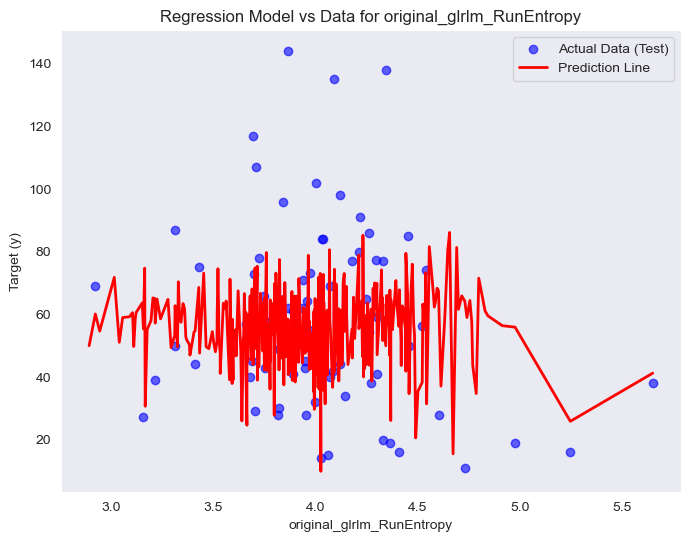

In [60]:
import matplotlib.pyplot as plt

# Ensure X is in DataFrame format for column access (if not already)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Generate predictions for the full range of X values for visualization
X_full_range = pd.concat([X_train, X_test])  # Combine training and testing data
y_full_pred = model.predict(X_full_range)

# Visualization: Plot for each feature
for feature in X.columns:
    plt.figure(figsize=(8, 6))

    # Scatter plot of actual data (testing points)
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual Data (Test)', alpha=0.6)

    # Line plot of predictions (model's regression line)
    sorted_indices = X_full_range[feature].argsort()
    plt.plot(
        X_full_range[feature].iloc[sorted_indices],
        y_full_pred[sorted_indices],
        color='red',
        label='Prediction Line',
        linewidth=2
    )

    # Formatting the plot
    plt.title(f"Regression Model vs Data for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Target (y)")
    plt.legend()
    plt.grid()
    plt.show()

# 3. SVM

## 3.1 rbf kernal

In [61]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model_rbf = SVR(kernel='rbf', C=10.0, epsilon=0.1, gamma='scale')
model_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = model_rbf.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_rbf)
r2 = r2_score(y_test, y_pred_rbf)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 814.0311700752032
R-squared: -0.020015512056674734


## 3.2 linear kernel

In [62]:
model_linear = SVR(kernel='linear', C=10.0, epsilon=0.1, gamma='scale')
model_linear.fit(X_train_scaled, y_train)

y_pred_linear = model_linear.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 838.7457773066162
R-squared: -0.05098396102663294


## 3.3 Polynomial kernel

In [63]:
model_poly = SVR(kernel='poly', C=10.0, epsilon=0.1, gamma='scale')
model_poly.fit(X_train_scaled, y_train)

y_pred_poly = model_poly.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 901.4954258082256
R-squared: -0.12961192663860377


## 3.4 Sigmoid kernel

In [64]:
model_sigmoid = SVR(kernel='sigmoid', C=10.0, epsilon=0.1, gamma='scale')
model_sigmoid.fit(X_train_scaled, y_train)

y_pred_sigmoid = model_sigmoid.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_sigmoid)
r2 = r2_score(y_test, y_pred_sigmoid)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1219.6875120384489
R-squared: -0.5283200789794023


## 3.5 Trying to tune the hyperparameter

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernels to try
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5, 1],  # Epsilon in the epsilon-SVR model
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient (for 'rbf', 'poly', 'sigmoid')
}

# Grid search
grid_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Optimize for R-squared
    verbose=1,  # Show progress
    n_jobs=-1  # Use all available processors
)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters and their performance
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R2 Score:", grid_search.best_score_)

# Evaluate on the test set
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Mean Squared Error (MSE):", mse)
print("Test R-squared (R2):", r2)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'C': 10, 'epsilon': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation R2 Score: 0.06621308801774184
Test Mean Squared Error (MSE): 826.403131490044
Test R-squared (R2): -0.03551810338439787


# Random Forest

# MLP

# CNN

# trying different feature selected
different feature selected, and see the mse and r2